# Bayesian Methods for Hackers 

In [1]:
# The code below can be passed over, as it is currently not important, plus it
# uses advanced topics we have not covered yet. LOOK AT PICTURE, MICHAEL!
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib as mpl
from cycler import cycler

mpl.rcParams.update(
    {
        "lines.linewidth": 2.0,
        "axes.edgecolor": "#bcbcbc",
        "patch.linewidth": 0.5,
        "legend.fancybox": True,
        "axes.prop_cycle": cycler('color', [
            "#348ABD",
            "#A60628",
            "#7A68A6",
            "#467821",
            "#CF4457",
            "#188487",
            "#E24A33"
        ]),
        "axes.facecolor": "#eeeeee",
        "axes.labelsize": "large",
        "axes.grid": True,
        "patch.edgecolor": "#eeeeee",
        "axes.titlesize": "x-large",
        "svg.fonttype": "path",
        "examples.directory": ""
    }
)

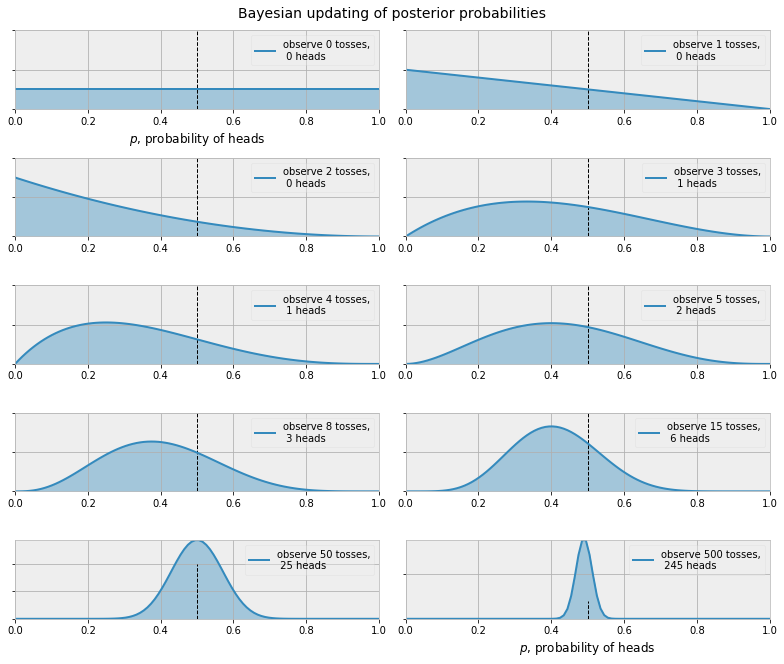

In [5]:
import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)/2, 2, k+1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()